<a href="https://colab.research.google.com/github/Roger-Quinelato/Revisao-Titanic/blob/main/Titanic_Revisao_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="darkgrid")

In [2]:
test = pd.read_csv("/content/sample_data/test.csv")
train = pd.read_csv("/content/sample_data/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**DUPLICATAS DO TREINO**

In [11]:
duplicates = train.duplicated()
print(duplicates.value_counts())

False    891
Name: count, dtype: int64


**DUPLICATAS DO TEST**

In [12]:
test_duplicates = test.duplicated()
print(test_duplicates.value_counts())

False    418
Name: count, dtype: int64


In [3]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='Count'>

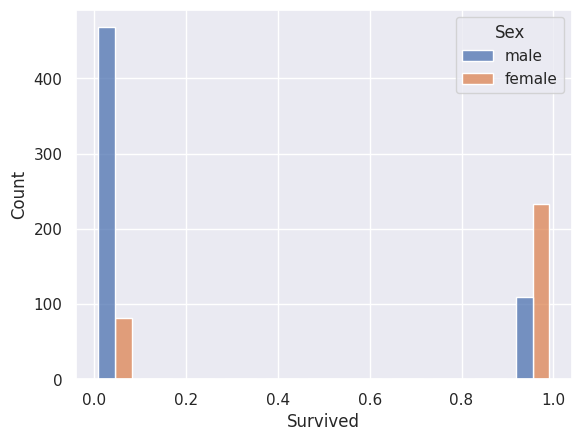

In [5]:
sns.histplot(train, x="Survived", shrink=.8, hue="Sex", multiple="dodge")

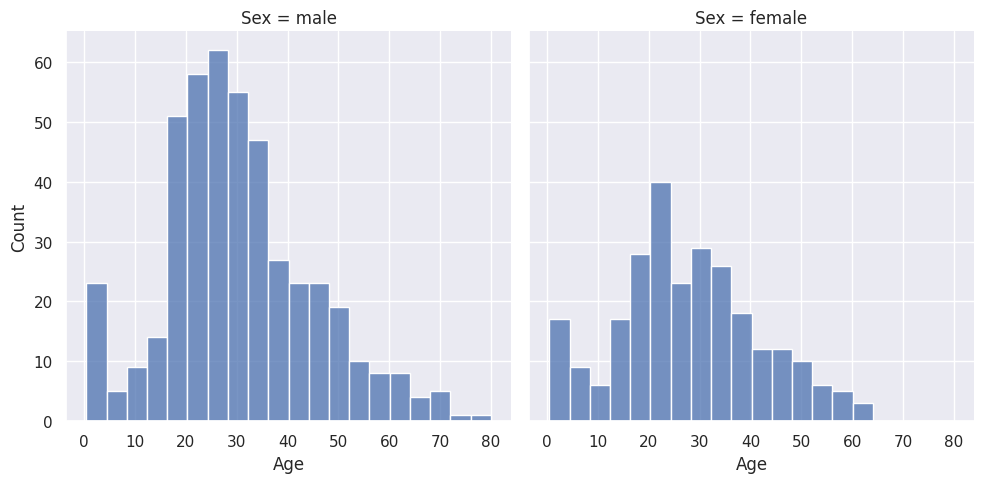

In [6]:
sns.displot(train, x="Age", col= "Sex")

In [7]:
print("Valores Ausentes de treino:  \n")
print(train.isnull().sum())

Valores Ausentes de treino:  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**PORCENTAGEM DE "Age" SEM DADOS**

In [8]:
nulo = train['Age'].isnull().sum()
n_nulo = train['Age'].size    #podia usar o len()
perc_nulo = (nulo/n_nulo)*100
perc_nulo = round(perc_nulo,2)
print("A porcentagem de números nulos é: ",perc_nulo)

A porcentagem de números nulos é:  19.87


**Pela idade estar menos de 20% e eu achar que é um fator que pode influenciar em "Survived" vou tratar.**

In [9]:
c_nulo = train['Cabin'].isnull().sum()
cn_nulo = train['Cabin'].size     #podia usar o len()
c_perc_nulo = (c_nulo/cn_nulo)*100
c_perc_nulo = c_perc_nulo.round(2)
print("A porcentagem de cabines sem números é : ", c_perc_nulo)

A porcentagem de cabines sem números é :  77.1


**Como o valor é alto e não deve interferir em "Survived" vou tirar.**

In [10]:
train = train.drop(['Cabin'], axis=1)
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')